In [10]:
## Importing requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("Fraud.csv")

In [4]:
df[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Checking for null values

In [5]:
n = df.isnull().sum()
n

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# We have no null values

## Checking for outliers

In [7]:
from scipy.stats import zscore

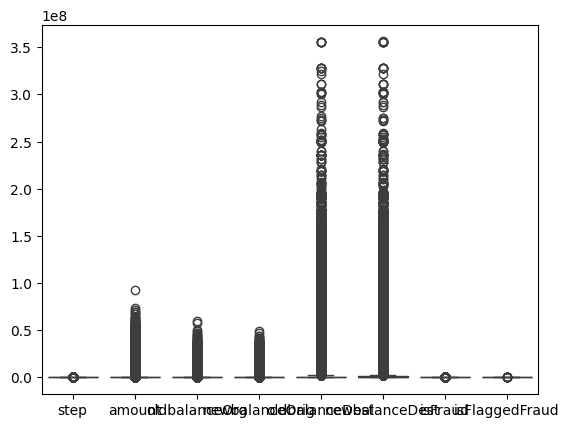

In [8]:
sns.boxplot(data=df)
plt.show()

## Displaying data 

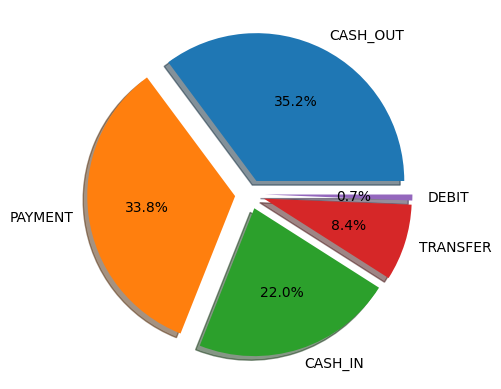

In [9]:
type = df['type'].value_counts()
payments = type.index
quantity = type.values

plt.pie(
    quantity,
    explode = [0.1] * len(quantity),
    labels = payments,
    shadow = True,
    autopct = '%1.1f%%'
)
plt.show()

## Feature selection

In [11]:
# The data containds columns that has string values. We can see that there are few columns that are no use for us in the training of the data. 
# Columns like type, namedest may not help. So, remove these features and select the only one that is useful for us.
# (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud) these are the columns that seems to be impactoing the data.

In [12]:
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [13]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [14]:
x[:10], y[:10]

(     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
 0   9839.64      170136.00       160296.36             0.0            0.00   
 1   1864.28       21249.00        19384.72             0.0            0.00   
 2    181.00         181.00            0.00             0.0            0.00   
 3    181.00         181.00            0.00         21182.0            0.00   
 4  11668.14       41554.00        29885.86             0.0            0.00   
 5   7817.71       53860.00        46042.29             0.0            0.00   
 6   7107.77      183195.00       176087.23             0.0            0.00   
 7   7861.64      176087.23       168225.59             0.0            0.00   
 8   4024.36        2671.00            0.00             0.0            0.00   
 9   5337.77       41720.00        36382.23         41898.0        40348.79   
 
    isFlaggedFraud  
 0               0  
 1               0  
 2               0  
 3               0  
 4               0  
 5 

In [15]:
x.info

<bound method DataFrame.info of              amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFlaggedFraud  
0                  0.00               0  
1                  0.00               0  
2

In [16]:
y.info

<bound method Series.info of 0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64>

## Data splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Divide our data into 7:3 ratio for training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 1)

In [21]:
x_train[:10], y_train[:10]

(            amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 6144590  171231.46         457.00       171688.46        54999.62   
 3201282    2858.25           0.00            0.00            0.00   
 4110413  116720.40     5761211.23      5877931.63       524292.67   
 5179672  260323.97         110.00            0.00      3092811.53   
 4187011   66806.24           0.00            0.00       267095.59   
 3382843  133657.92           0.00            0.00      1490011.73   
 375816   428258.98           0.00            0.00      3169980.02   
 2492241   74174.03     8999680.63      9073854.66       274621.83   
 4703475   16554.56      107481.15        90926.59            0.00   
 6060817   39591.12           0.00            0.00      1057042.74   
 
          newbalanceDest  isFlaggedFraud  
 6144590            0.00               0  
 3201282            0.00               0  
 4110413       407572.28               0  
 5179672      3353135.50               0  
 4187011     

In [22]:
x_test[:10], y_test[:10]

(            amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 6322570   23557.12        8059.00        31616.12       169508.66   
 3621196    6236.13           0.00            0.00            0.00   
 1226256   33981.87       18745.72            0.00            0.00   
 2803274  263006.42       20072.00            0.00       390253.56   
 3201247  152013.74       20765.00            0.00       252719.19   
 3681019    2854.62           0.00            0.00            0.00   
 1351584  336874.19      201316.00            0.00        20820.92   
 5422829  520230.74           0.00            0.00       540059.79   
 5870912   51179.09     8278679.08      8329858.17       602965.54   
 2400263  735977.55        8900.00            0.00            0.00   
 
          newbalanceDest  isFlaggedFraud  
 6322570       145951.53               0  
 3621196            0.00               0  
 1226256            0.00               0  
 2803274       653259.98               0  
 3201247     

## Model building

In [17]:
# Selecting proper model
# We have to classify the model to be either fraud or not i.e., represented as 1, 0 respectively.
# Since we are working on large dataset, lets select LogesticRegression.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [27]:
model

LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
model.score(x_test, y_test)

0.9992005389813211

## Tuning parameters

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
} 
random_search = RandomizedSearchCV(model, param_grid, n_iter=4, cv=5, n_jobs=-1)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=4, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'class_weight': ['balanced'],
                                        'solver': ['liblinear']})

In [72]:
y_pred = model.predict(x_test)

In [73]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_pred, y_test)

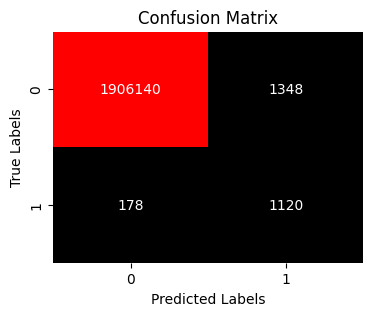

In [76]:
plt.figure(figsize=(4, 3)) 
cmap = sns.color_palette(["black", "red"])
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [78]:
y_prob = model.predict_proba(x_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9992005389813211
Precision: 0.8628659476117103
Recall: 0.4538087520259319
F1 Score: 0.5947955390334573
ROC-AUC Score: 0.9823372575353171
